In [1]:
'''

This code is part of the SIPN2 project focused on improving sub-seasonal to seasonal predictions of Arctic Sea Ice. 
If you use this code for a publication or presentation, please cite the reference in the README.md on the
main page (https://github.com/NicWayand/ESIO). 

Questions or comments should be addressed to nicway@uw.edu

Copyright (c) 2018 Nic Wayand

GNU General Public License v3.0


'''

'''
Plot exetent/area from observations and models (past and future)
'''

%matplotlib inline
%load_ext autoreload
%autoreload
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt, mpld3
from collections import OrderedDict
import itertools
import numpy as np
import numpy.ma as ma
import pandas as pd
import struct
import os
import xarray as xr
import glob
import datetime
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seaborn as sns
np.seterr(divide='ignore', invalid='ignore')

import esio
import esiodata as ed

# General plotting settings
sns.set_style('whitegrid')
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})

/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  F

In [2]:
# Plotting Info
runType = 'forecast'
variables = ['sic'] #, 'hi'
metric1 = 'extent'

In [3]:
# Initialization times to plot
cd = datetime.datetime.now()
cd = datetime.datetime(cd.year, cd.month, cd.day) # Assumes hours 00, min 00
SD = cd - datetime.timedelta(days=90)
# SD = cd - datetime.timedelta(days=4*365)

# ED = cd + datetime.timedelta(days=365)

In [4]:
# Info about models runs
# icePredicted = {'gfdlsipn':True, 'piomas':True, 'yopp':True, 'bom':False, 'cma':True, 'ecmwf':True, 
#               'hcmr':False, 'isaccnr':False, 'jma':False, 'metreofr':True, 'ukmo':True, 'eccc':False, 
#               'kma':True, 'ncep':True, 'ukmetofficesipn':True, 'ecmwfsipn':True}
# biasCorrected = 

In [5]:
#############################################################
# Load in Data
#############################################################
E = ed.esiodata.load()

In [6]:
# Load obs
import timeit
start_time = timeit.default_timer()
ds_obs = xr.open_mfdataset(E.obs['NSIDC_0081']['sipn_nc']+'/*.nc', concat_dim='time', autoclose=True)#,
print(timeit.default_timer() - start_time)

58.953093064017594


In [7]:
# Load in regional data
# Note minor -0.000004 degree differences in latitude
ds_region = xr.open_dataset(os.path.join(E.grid_dir, 'sio_2016_mask_Update.nc'))

In [8]:
cdate = datetime.datetime.now()


# Plot Raw extents and only models that predict sea ice

Sea of Okhotsk
gfdlsipn
0.3561919810017571  seconds.
piomas
yopp
1.54635681794025  seconds.
ecmwf
0.20307553699240088  seconds.
metreofr
0.07958367199171335  seconds.
ukmo
0.6682711190078408  seconds.
kma
0.671901841997169  seconds.
ncep
0.8113526469096541  seconds.
ukmetofficesipn
15.047180249006487  seconds.
ecmwfsipn
2.1261448699515313  seconds.
usnavysipn
0.10621559107676148  seconds.
usnavyncep
0.1450090790167451  seconds.
rasmesrl
1.6147826039232314  seconds.
noaasipn
0.017229438992217183  seconds.
noaasipn_ext
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Bering
gfdlsipn
0.38035040395334363  seconds.
piomas
yopp
1.7208105910103768  seconds.
ecmwf
0.2103248549392447  seconds.
metreofr
0.1111734249861911  seconds.
ukmo
0.7803351799957454  seconds.
kma
0.7732915179803967  seconds.
ncep
0.783881549956277  seconds.
ukmetofficesipn
13.876021689968184  seconds.
ecmwfsipn
2.719105486990884  seconds.
usnavysipn
0.1377778520109132  seconds.
usnavyncep
0.17424663004931062  seconds.
rasmesrl
1.568716862006113  seconds.
noaasipn
0.012633642996661365  seconds.
noaasipn_ext
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Hudson Bay
gfdlsipn
0.3774072459200397  seconds.
piomas
yopp
1.9828247029799968  seconds.
ecmwf
0.2453209940576926  seconds.
metreofr
0.13183039298746735  seconds.
ukmo
0.8194821799406782  seconds.
kma
0.85163156199269  seconds.
ncep
0.7940841319505125  seconds.
ukmetofficesipn
13.456779876025394  seconds.
ecmwfsipn
2.1733964619925246  seconds.
usnavysipn
0.1118761629331857  seconds.
usnavyncep
0.14327668701298535  seconds.
rasmesrl
1.4766420110827312  seconds.
noaasipn
0.016267537022940814  seconds.
noaasipn_ext
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


St John
gfdlsipn
0.38837823003996164  seconds.
piomas
yopp
1.3899546440225095  seconds.
ecmwf
0.1557901450432837  seconds.
metreofr
0.06644032709300518  seconds.
ukmo
0.6530474780593067  seconds.
kma
0.6095765320351347  seconds.
ncep
0.7080713899340481  seconds.
ukmetofficesipn
13.591650997055694  seconds.
ecmwfsipn
1.9745167230721563  seconds.
usnavysipn
0.09368043392896652  seconds.
usnavyncep
0.08335414307657629  seconds.
rasmesrl
1.5250381489749998  seconds.
noaasipn
0.011794298072345555  seconds.
noaasipn_ext
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Baffin Bay
gfdlsipn
0.372925121919252  seconds.
piomas
yopp
1.6711566109443083  seconds.
ecmwf
0.17898083897307515  seconds.
metreofr
0.09875018894672394  seconds.
ukmo
0.7354850829578936  seconds.
kma
0.6897799810394645  seconds.
ncep
1.1928755360422656  seconds.
ukmetofficesipn
14.00769387499895  seconds.
ecmwfsipn
2.2744872430339456  seconds.
usnavysipn
0.11647867504507303  seconds.
usnavyncep
0.17802339897025377  seconds.
rasmesrl
1.4332111070398241  seconds.
noaasipn
0.014759243000298738  seconds.
noaasipn_ext
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


East Greenland Sea
gfdlsipn
0.41938938794191927  seconds.
piomas
yopp
1.5412875659530982  seconds.
ecmwf
0.17289857391733676  seconds.
metreofr
0.09634251694660634  seconds.
ukmo
0.6705080290557817  seconds.
kma
0.6931363809853792  seconds.
ncep
0.6312605489511043  seconds.
ukmetofficesipn
13.915849864017218  seconds.
ecmwfsipn
2.3524682979332283  seconds.
usnavysipn
0.10800181503873318  seconds.
usnavyncep
0.1550057779531926  seconds.
rasmesrl
1.4849399940576404  seconds.
noaasipn
0.014740757993422449  seconds.
noaasipn_ext
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Barents Sea
gfdlsipn
0.3788507740246132  seconds.
piomas
yopp
1.5913922380423173  seconds.
ecmwf
0.21710565104149282  seconds.
metreofr
0.086519923992455  seconds.
ukmo
0.7780510849552229  seconds.
kma
0.6572322649881244  seconds.
ncep
0.8044312669662759  seconds.
ukmetofficesipn
13.922058445983566  seconds.
ecmwfsipn
2.812434631981887  seconds.
usnavysipn
0.16429012001026422  seconds.
usnavyncep
0.21996039105579257  seconds.
rasmesrl
1.5710606760112569  seconds.
noaasipn
0.015356117975898087  seconds.
noaasipn_ext
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Kara Sea
gfdlsipn
0.38565091404598206  seconds.
piomas
yopp
1.6235814068932086  seconds.
ecmwf
0.16929341200739145  seconds.
metreofr
0.0972295009996742  seconds.
ukmo
0.6051474818959832  seconds.
kma
0.6867827590322122  seconds.
ncep
0.6815861040959135  seconds.
ukmetofficesipn
13.75231155497022  seconds.
ecmwfsipn
2.2347976219607517  seconds.
usnavysipn
0.12918323499616235  seconds.
usnavyncep
0.17395494796801358  seconds.
rasmesrl
1.497539562988095  seconds.
noaasipn
0.012441225000657141  seconds.
noaasipn_ext
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Laptev Sea
gfdlsipn
0.38253464992158115  seconds.
piomas
yopp
1.5965549310203642  seconds.
ecmwf
0.18549900106154382  seconds.
metreofr
0.08178853802382946  seconds.
ukmo
0.686990162008442  seconds.
kma
0.6701061289058998  seconds.
ncep
0.6453040819615126  seconds.
ukmetofficesipn
14.018795829033479  seconds.
ecmwfsipn
2.2146176480455324  seconds.
usnavysipn
0.11218091996852309  seconds.
usnavyncep
0.13931741192936897  seconds.
rasmesrl
1.3979264000663534  seconds.
noaasipn
0.011979078059084713  seconds.
noaasipn_ext
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


East Siberian Sea
gfdlsipn
0.39907405292615294  seconds.
piomas
yopp
1.4141613129759207  seconds.
ecmwf
0.1732038389891386  seconds.
metreofr
0.09592768002767116  seconds.
ukmo
0.6185012320056558  seconds.
kma
0.6483912880066782  seconds.
ncep
0.676149292034097  seconds.
ukmetofficesipn
13.783415924059227  seconds.
ecmwfsipn
2.1781787609215826  seconds.
usnavysipn
0.1390710799023509  seconds.
usnavyncep
0.18727377790492028  seconds.
rasmesrl
1.505198587081395  seconds.
noaasipn
0.01424073101952672  seconds.
noaasipn_ext
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Chukchi Sea
gfdlsipn
0.38425956200808287  seconds.
piomas
yopp
1.5169251769548282  seconds.
ecmwf
0.2060348589438945  seconds.
metreofr
0.08767250704113394  seconds.
ukmo
0.6209196780109778  seconds.
kma
0.6532265610294417  seconds.
ncep
0.6825015969807282  seconds.
ukmetofficesipn
13.902966196998022  seconds.
ecmwfsipn
2.5215484340442345  seconds.
usnavysipn
0.11782353697344661  seconds.
usnavyncep
0.17313282005488873  seconds.
rasmesrl
1.4089176149573177  seconds.
noaasipn
0.014756307005882263  seconds.
noaasipn_ext
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Beaufort Sea
gfdlsipn
0.45216978702228516  seconds.
piomas
yopp
1.5662483489140868  seconds.
ecmwf
0.2020688959164545  seconds.
metreofr
0.08494064304977655  seconds.
ukmo
0.7201130640460178  seconds.
kma
0.6677889749407768  seconds.
ncep
0.754752652021125  seconds.
ukmetofficesipn
14.01910431496799  seconds.
ecmwfsipn
2.181604378973134  seconds.
usnavysipn
0.11206323292572051  seconds.
usnavyncep
0.13979602290783077  seconds.
rasmesrl
1.435690375044942  seconds.
noaasipn
0.012643055990338326  seconds.
noaasipn_ext
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Canadian Islands
gfdlsipn
0.39778310095425695  seconds.
piomas
yopp
1.6758333410834894  seconds.
ecmwf
0.19774093700107187  seconds.
metreofr
0.10433913697488606  seconds.
ukmo
0.7557449339656159  seconds.
kma
0.6502996630733833  seconds.
ncep
0.7358407150022686  seconds.
ukmetofficesipn
13.745555363944732  seconds.
ecmwfsipn
2.2299601970007643  seconds.
usnavysipn
0.14370170002803206  seconds.
usnavyncep
0.18385400401894003  seconds.
rasmesrl
1.4940702639287338  seconds.
noaasipn
0.012152343988418579  seconds.
noaasipn_ext
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Central Arctic
gfdlsipn
0.4528483949834481  seconds.
piomas
yopp
1.5812475259881467  seconds.
ecmwf
0.19966654491145164  seconds.
metreofr
0.09929540904704481  seconds.
ukmo
0.6524720459710807  seconds.
kma
0.6344773919554427  seconds.
ncep
0.6679899420123547  seconds.
ukmetofficesipn
13.710267702001147  seconds.
ecmwfsipn
2.048375137965195  seconds.
usnavysipn
0.10668563796207309  seconds.
usnavyncep
0.13876258302479982  seconds.
rasmesrl
1.40141540102195  seconds.
noaasipn
0.012419842998497188  seconds.
noaasipn_ext
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


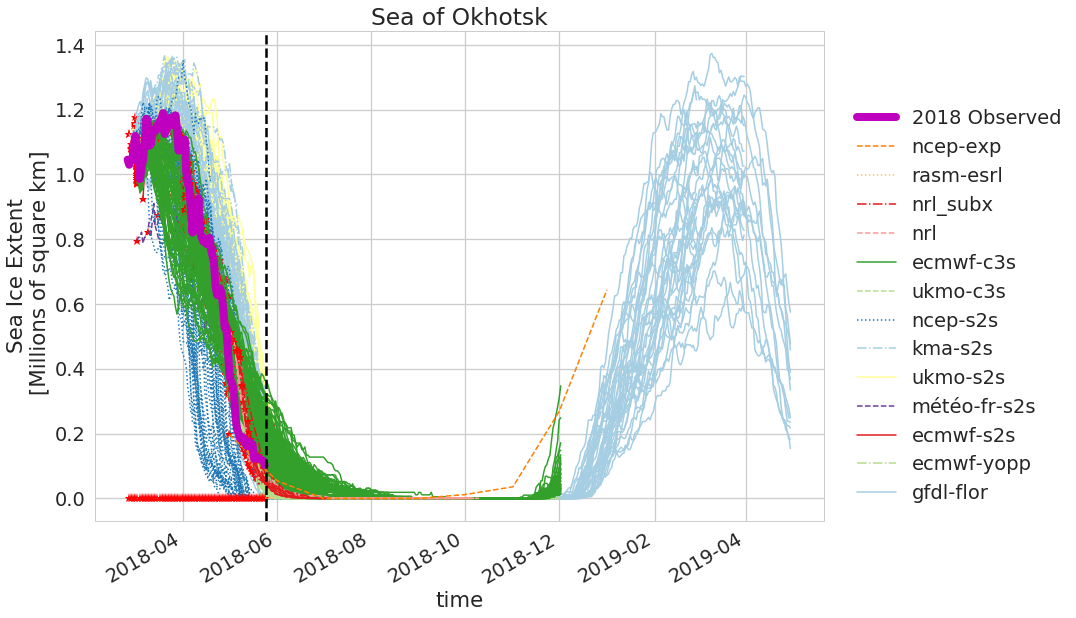

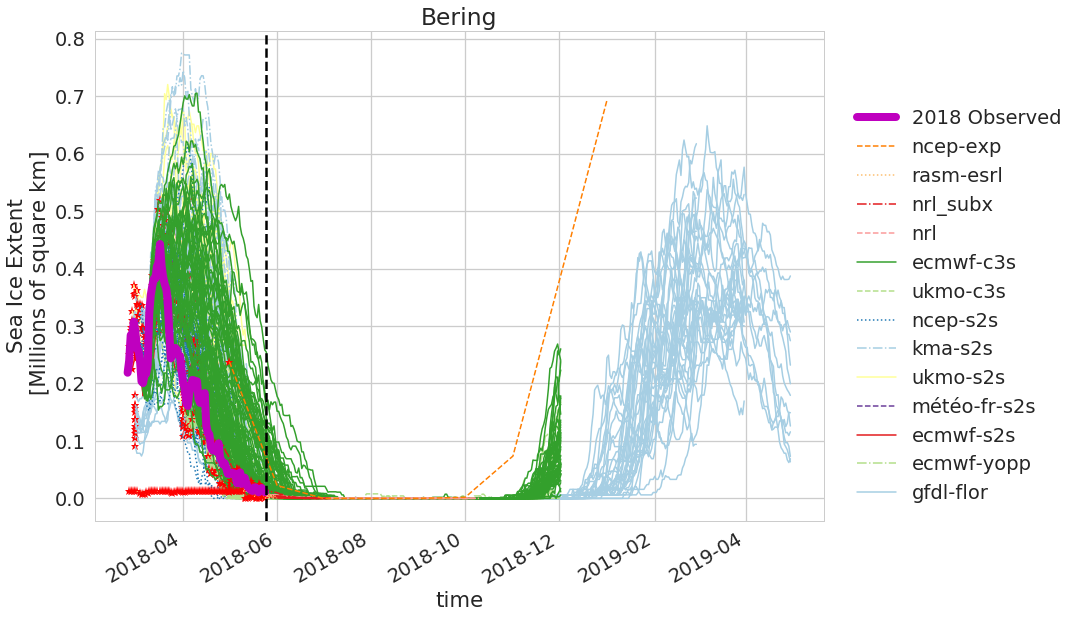

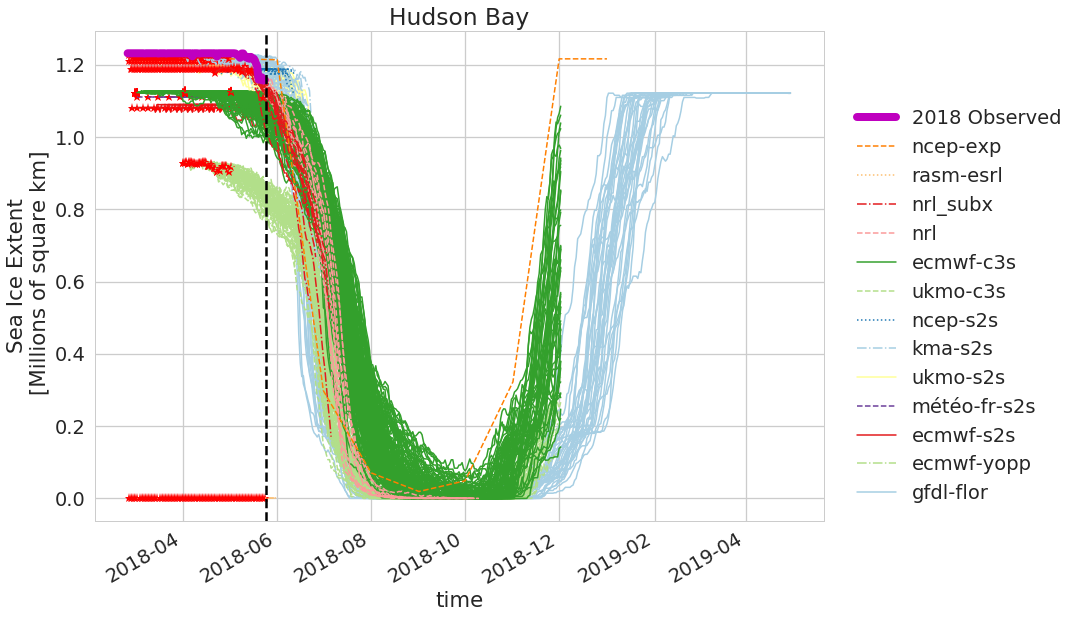

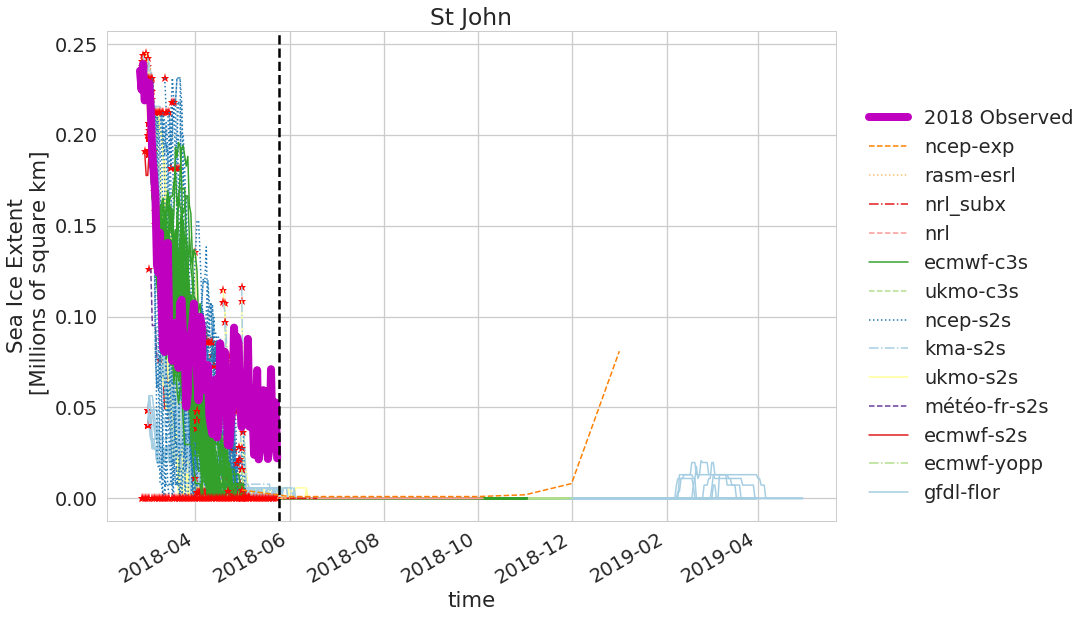

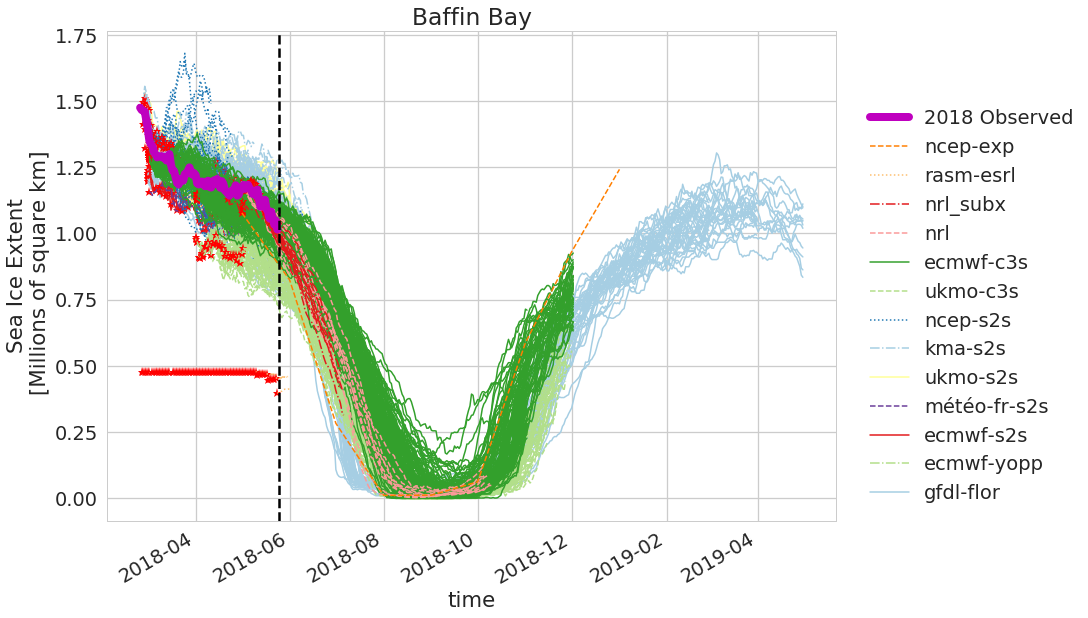

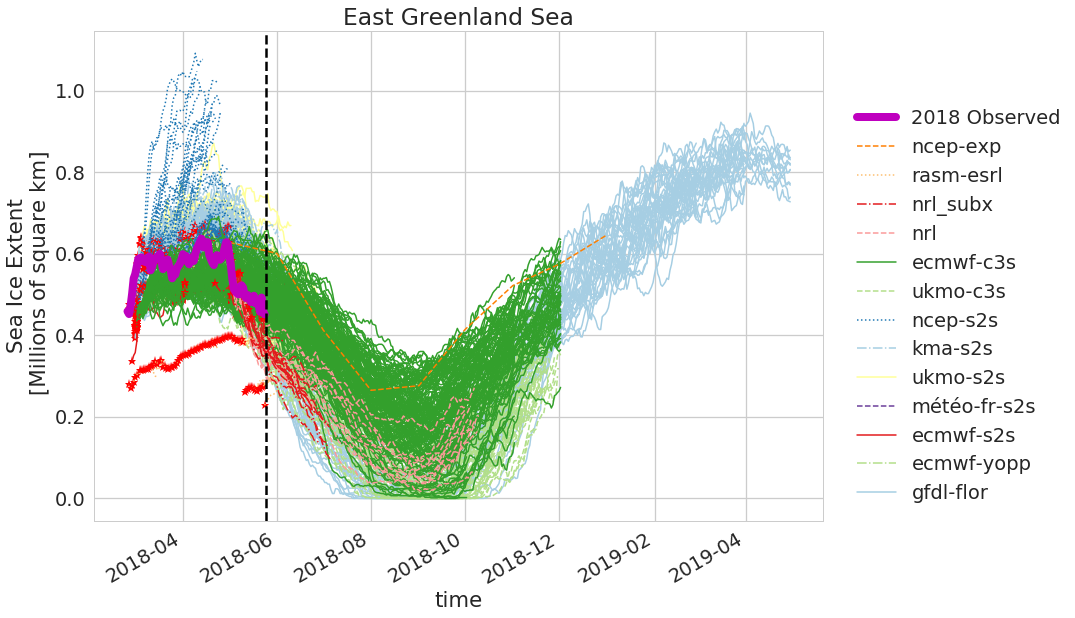

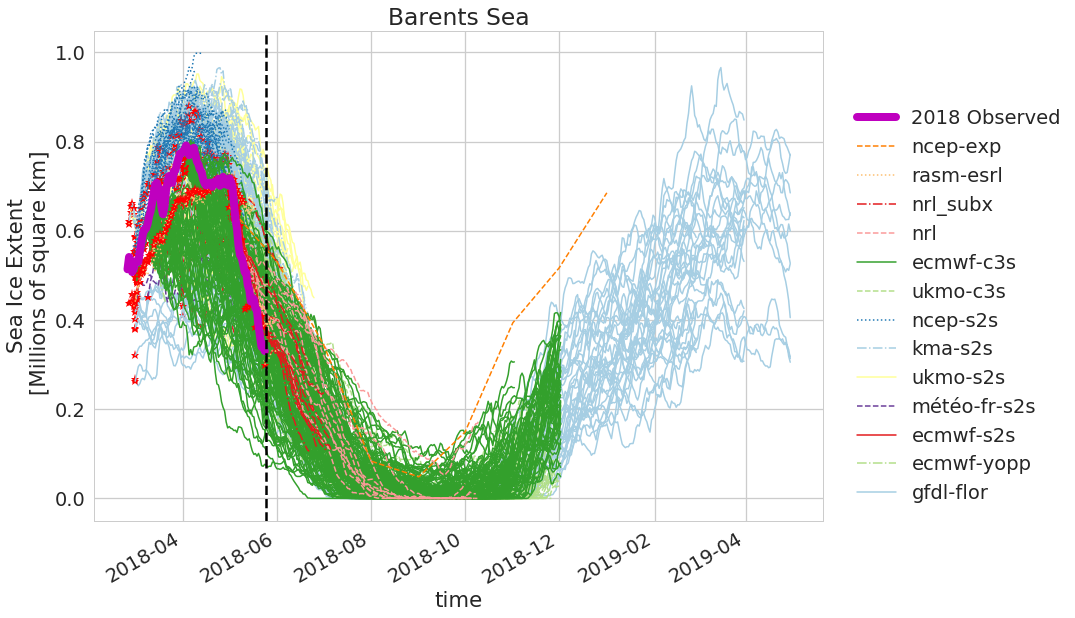

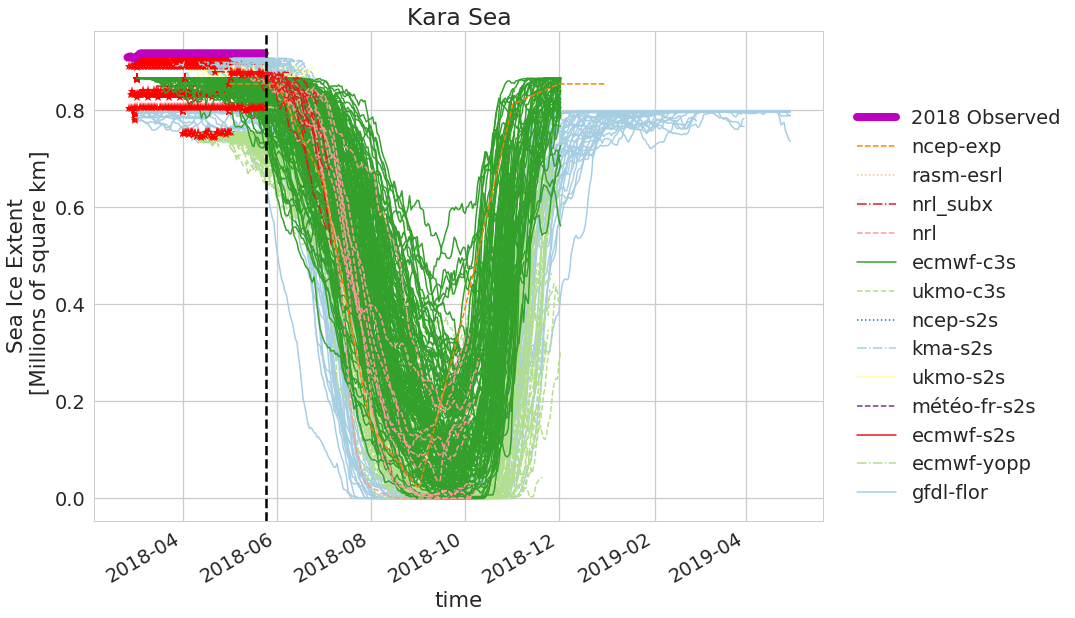

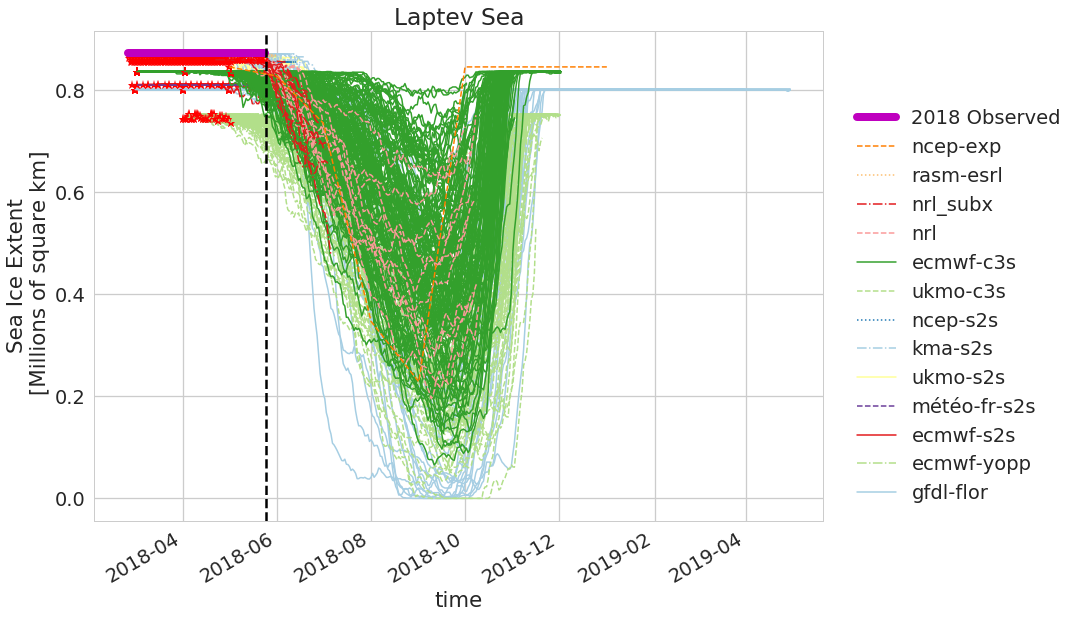

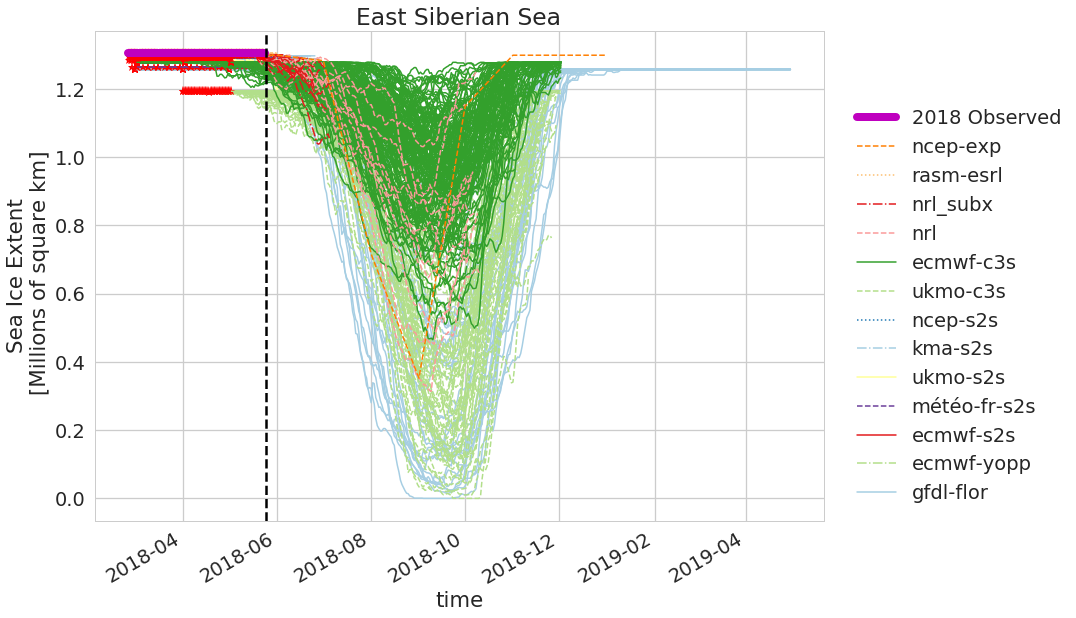

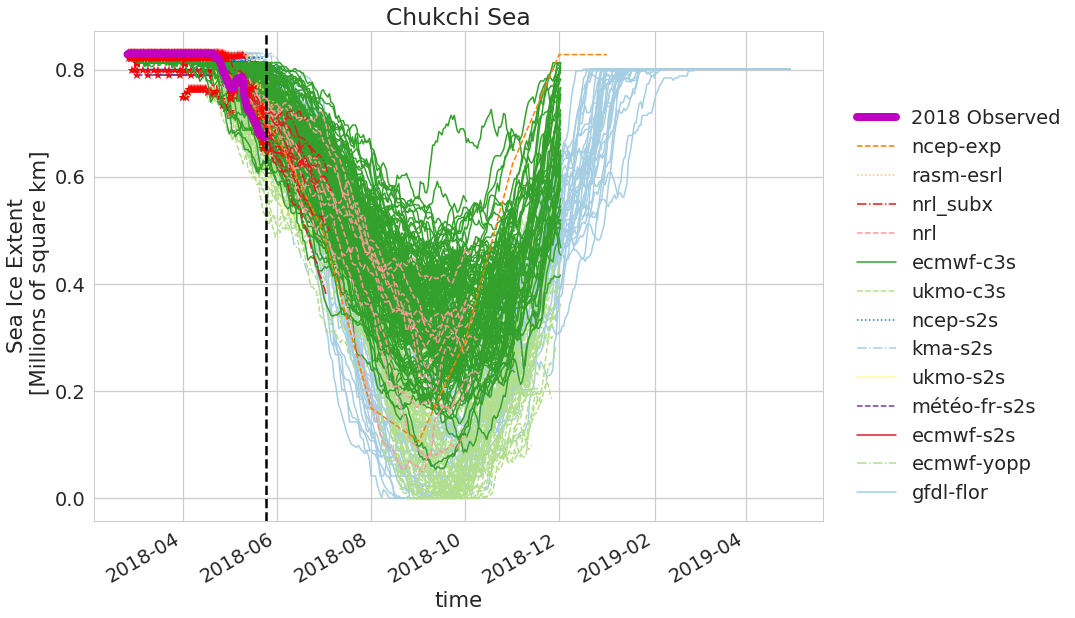

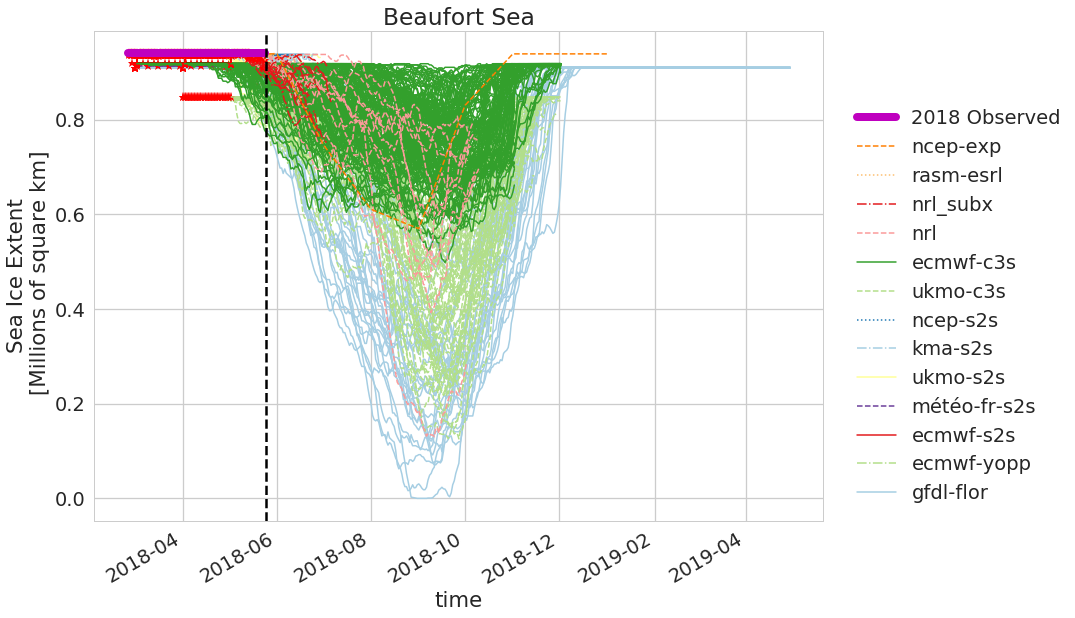

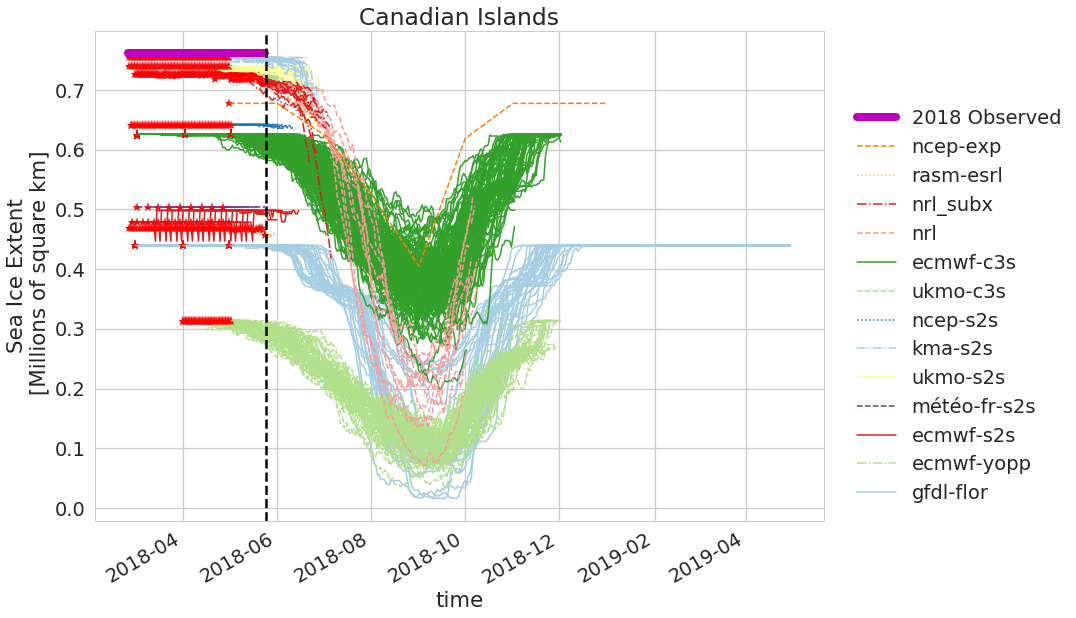

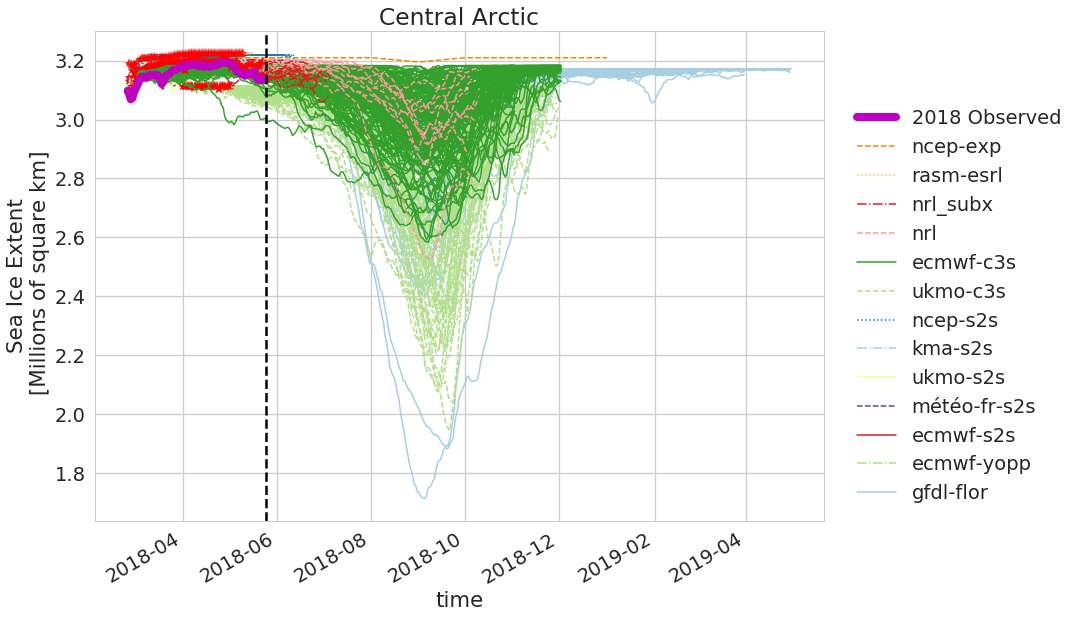

In [9]:
# cmap_c = itertools.cycle(sns.color_palette("Paired", len(E.model.keys()) ))
# linecycler = itertools.cycle(["-","--","-.",":","--"])
for cvar in variables:
    
    fig_dir = os.path.join(E.fig_dir, 'model', 'all_model', cvar, "regional_timeseries")
    if not os.path.exists(fig_dir):
        os.makedirs(fig_dir)

    # For each region
    for cR in ds_region.ocean_regions.values:    
        cR_name = ds_region.region_names.sel(nregions=cR).item(0)
        print(cR_name)

        # New Plot
        f = plt.figure(figsize=(15,10))
        ax1 = plt.subplot(1, 1, 1) # Observations

        for (i, cmod) in enumerate(E.model.keys()):
#         for (i, cmod) in enumerate(['usnavyncep','usnavysipn']):

            if not E.icePredicted[cmod]:
                continue
            print(cmod)
            # Load in Model
            model_forecast = os.path.join(E.model[cmod][runType]['sipn_nc_agg'], '*.nc')

            # Check we have files 
            files = glob.glob(model_forecast)
            if not files:
                #print("Skipping model", cmod, "no forecast files found.")
                continue # Skip this model
            ds_model = xr.open_mfdataset(model_forecast, concat_dim='init_time')

            # Get Extent
            ds_model = ds_model.Extent

            # Select init of interest
            ds_model = ds_model.where(ds_model.init_time>=np.datetime64(SD), drop=True)
            
#             # Take mean of ensemble
#             ds_model = ds_model.mean(dim='ensemble')

            # Select region
            ds_model = ds_model.sel(nregions=cR)

            # Get model plotting specs
            cc = E.model_color[cmod]
            cl = E.model_linestyle[cmod]

            # Plot Model
            if i == 1: # Control only one initiailzation label in legend
                no_init_label = False
            else:
                no_init_label = True
            import timeit
            start_time = timeit.default_timer()
            
            esio.plot_reforecast(ds=ds_model, axin=ax1, 
                                 labelin=E.model[cmod]['model_label'],
                                 color=cc, marker=None,
                                 linestyle=cl,
                                 no_init_label=no_init_label)
            print( (timeit.default_timer() - start_time), ' seconds.' )

            # Memeory clean up
            ds_model = None

        # Plot observations
        print('Plotting observations')
        ds_obs_reg = ds_obs.sic.where(ds_obs.time>=np.datetime64(SD), drop=True)
        ds_obs_reg = ds_obs_reg.where(ds_region.mask==cR)
        ds_obs_reg = ((ds_obs_reg >= 0.15).astype('int') * ds_region.area).sum(dim='x').sum(dim='y')/(10**6)
        ds_obs_reg.plot(ax=ax1, label=str(cdate.year)+' Observed', color='m', linewidth=8)
        ax1.set_ylabel('Sea Ice Extent\n [Millions of square km]')
        cxlims = ax1.get_xlim()
        

    #     # 1980-2010 Historical Interquartile Range
    #     plt.fill_between(ds_per_mean.time.values, ds_per_mean + ds_per_std, 
    #                  ds_per_mean - ds_per_std, alpha=0.35, label='1980-2010\nInterquartile Range', color='m')
        ax1.set_xlim(cxlims) # fix x limits
        cylims = ax1.get_ylim()

        # Plot current date line
        ax1.plot([cd, cd], [cylims[0], cylims[1]], color='k', linestyle='--')
        
        ax1.set_title(cR_name)

        # Add legend (static)
        handles, labels = ax1.get_legend_handles_labels()
        ax1.legend(handles[::-1], labels[::-1], loc='lower right',bbox_to_anchor=(1.35, 0))

        f.autofmt_xdate()
        ax1.set_ylim(cylims)
        plt.subplots_adjust(right=.8)

        # Save to file
        base_name_out = 'Region_'+cR_name.replace(" ", "_")+'_'+metric1+'_'+runType+'_raw_predicted'
        f_out = os.path.join(fig_dir, base_name_out+'.png')
        f.savefig(f_out,bbox_inches='tight',dpi=200)
        mpld3.save_html(f, os.path.join(fig_dir, base_name_out+'.html'))

        # Mem clean up
        ds_model = None
        ds_obs_reg = None
        f = None